# PyTesseract in Depth

## Functions

get_tesseract_version<br><br>
Returns the Tesseract version installed in the system.

In [2]:

import pytesseract

print(pytesseract.get_tesseract_version())


4.1.1


image_to_string<br><br>
Returns the result of a Tesseract OCR run on the image to string

This iS @ sample piece of text used for Fy Tesseract testing purposes.


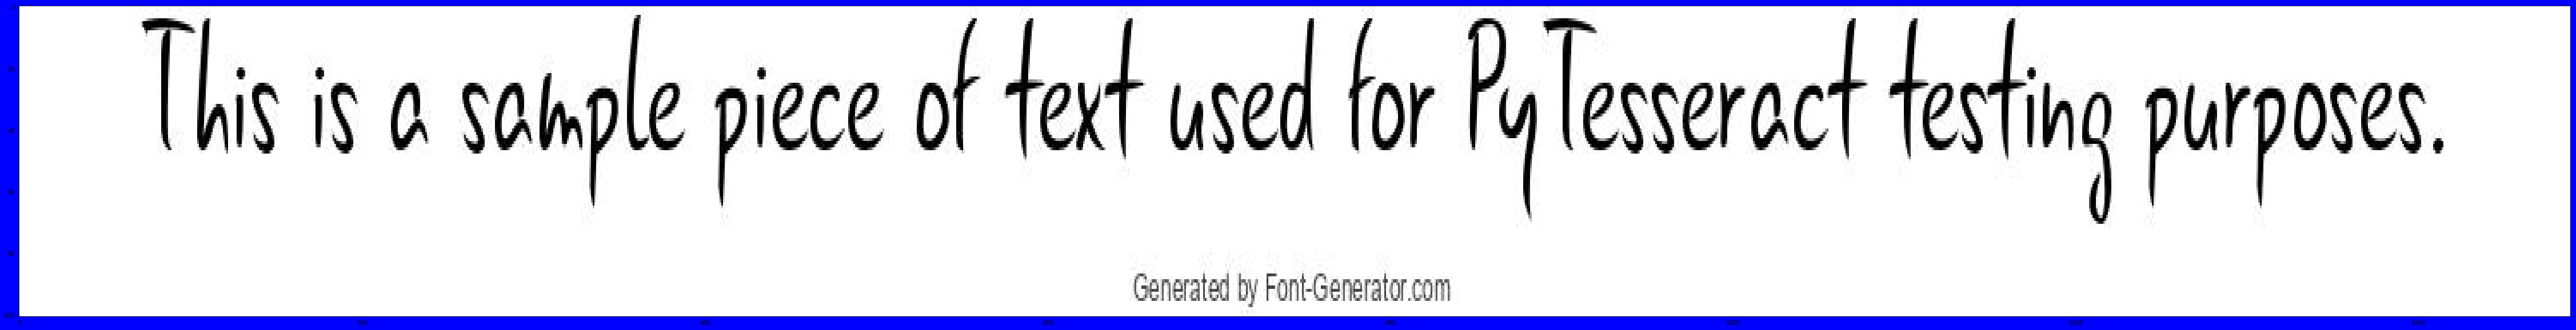

In [3]:

import cv2
import matplotlib.pyplot as plt
import pytesseract
%matplotlib inline


path = './generatedtext.jpg'
img = cv2.imread(filename=path, flags=cv2.IMREAD_COLOR)

plt.figure(num=None, figsize=(80, 10), edgecolor='black', facecolor='blue')
plt.imshow(X=img, aspect='auto', origin='upper', cmap='gray')
result_string = pytesseract.image_to_string(image=img)
print(result_string)


image_to_boxes<br><br>
Returns result containing recognized characters and their box boundaries

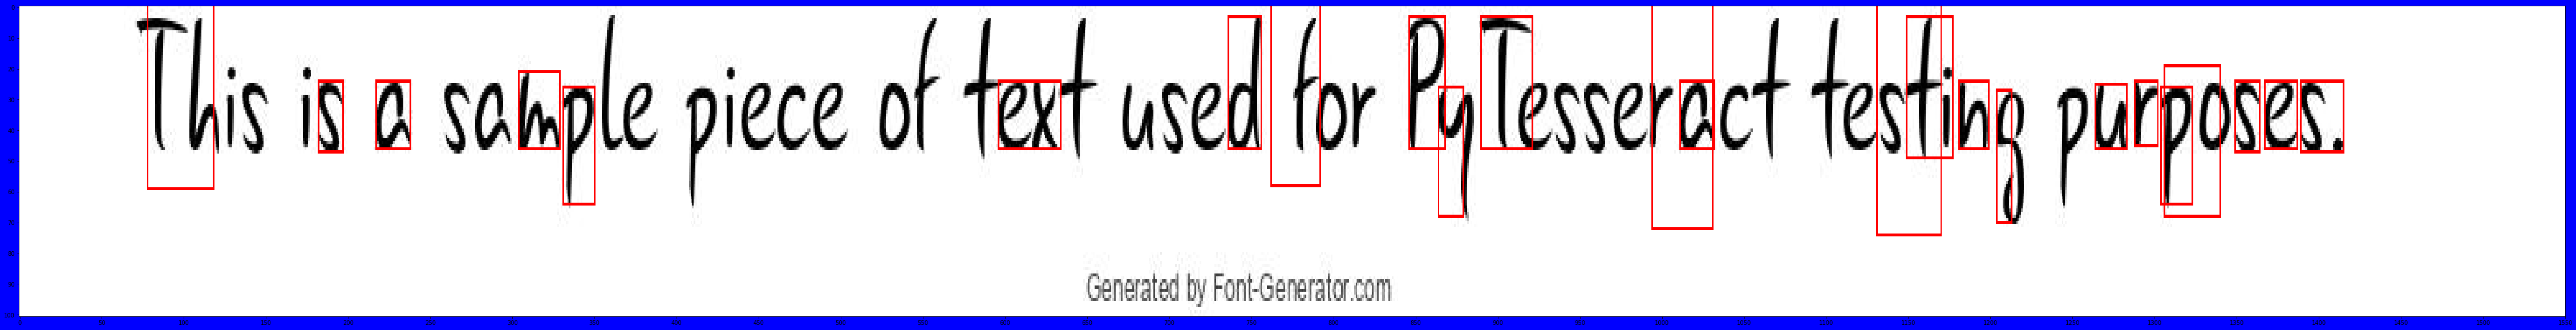

In [4]:

import cv2
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image, ImageDraw
import pytesseract
%matplotlib inline

path = './generatedtext.jpg'
img = cv2.imread(filename=path, flags=cv2.IMREAD_COLOR)
result_box = pytesseract.image_to_boxes(image=img)

# bounding rectangle dictionary of coordinates
rect_dict = dict((line[0], [int(c) for c in line.split()[1:5]]) for line in result_box.split(sep='\n'))

# DEBUGGING PURPOSES ONLY
if not __debug__:
    print(type(result_box))
    print(result_box)

# drawing bounding rectangles
im = Image.open(fp=path, mode='r')
draw = ImageDraw.Draw(im=im)
for rect in rect_dict.values():
    """Draw a bounding rectangle for each letter"""
    draw.rectangle(xy=[(rect[0], 100-rect[1]), (rect[2], 100-rect[3])], fill=None, outline='red')
im_bound = np.asarray(a=im)

# plotting
plt.figure(num=None, figsize=(80, 10), edgecolor='black', facecolor='blue')
plt.imshow(X=im_bound, aspect='auto', origin='upper', cmap='gray')
plt.xticks(np.arange(0, 1600, 50))
plt.yticks(np.arange(0, 110, 10))
if not __debug__:
    print(im_bound)


image_to_data<br><br>
Returns result containing box boundaries, confidences, and other information.<br>
Requires Tesseract 3.05+. For more information, please check the Tesseract TSV documentation

dict_keys(['level', 'page_num', 'block_num', 'par_num', 'line_num', 'word_num', 'left', 'top', 'width', 'height', 'conf', 'text'])
dict_values([[1, 2, 3, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [0, 0, 0, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13], [0, 72, 72, 72, 72, 173, 217, 259, 406, 524, 557, 672, 762, 846, 890, 1075, 1241], [0, 0, 0, 0, 0, 20, 25, 0, 16, 4, 0, 4, 0, 4, 0, 0, 20], [1489, 1343, 1343, 1343, 76, 24, 21, 123, 98, 37, 99, 84, 60, 33, 188, 138, 174], [101, 75, 75, 75, 60, 28, 22, 69, 53, 43, 59, 44, 59, 65, 73, 75, 49], ['-1', '-1', '-1', '-1', 96, 88, 31, 86, 95, 96, 96, 96, 96, 77, 9, 90, 94], ['', '', '', '', 'This', 'iS', '@', 'sample', 'piece', 'of', 'text', 'used', 'for', 'Fy', 'Tesseract', 'testing', 'purposes.']])


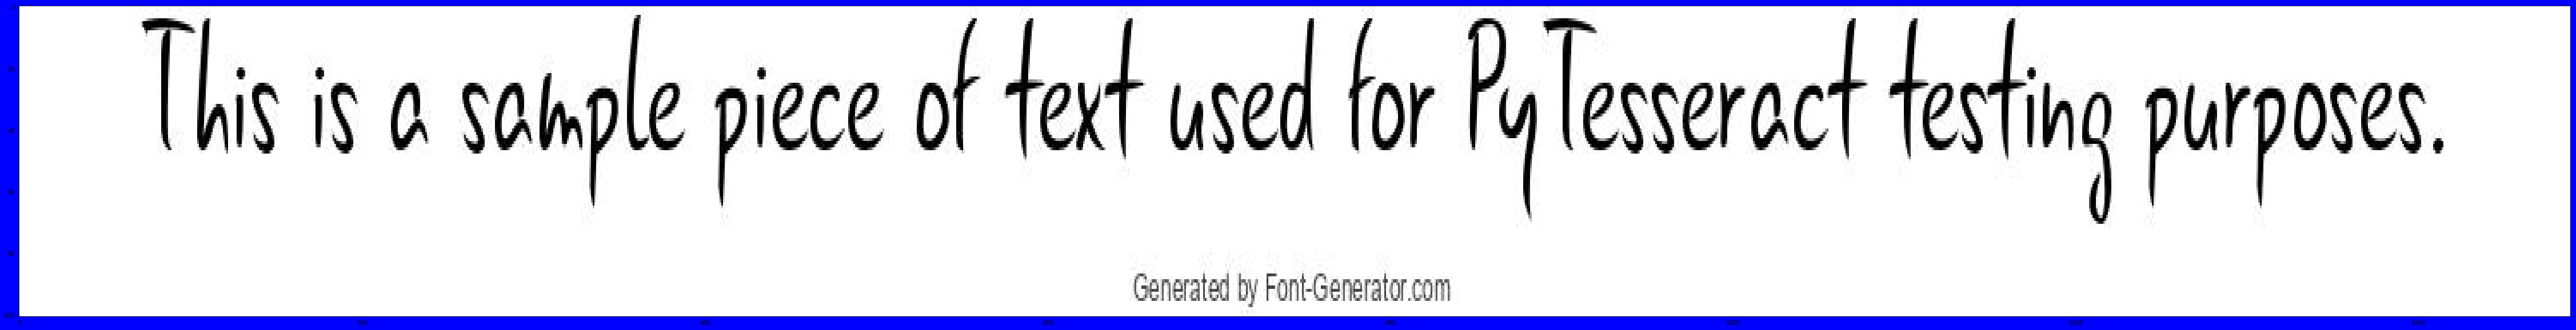

In [5]:


import cv2
import matplotlib.pyplot as plt
import pytesseract
from pytesseract import Output
%matplotlib inline

path = './generatedtext.jpg'
img = cv2.imread(filename=path, flags=cv2.IMREAD_COLOR)
img_data = pytesseract.image_to_data(image=img, output_type=Output.DICT)
if __debug__:
    print(img_data.keys())
    print(img_data.values())
    
plt.figure(num=None, figsize=(80, 10), edgecolor='black', facecolor='blue')
plt.imshow(X=img, aspect='auto', origin='upper', cmap='gray')


image_to_osd<br><br>
Returns result containing information about orientation and script detection.

Page number: 0
Orientation in degrees: 0
Rotate: 0
Orientation confidence: 3.15
Script: Cyrillic
Script confidence: 6.67


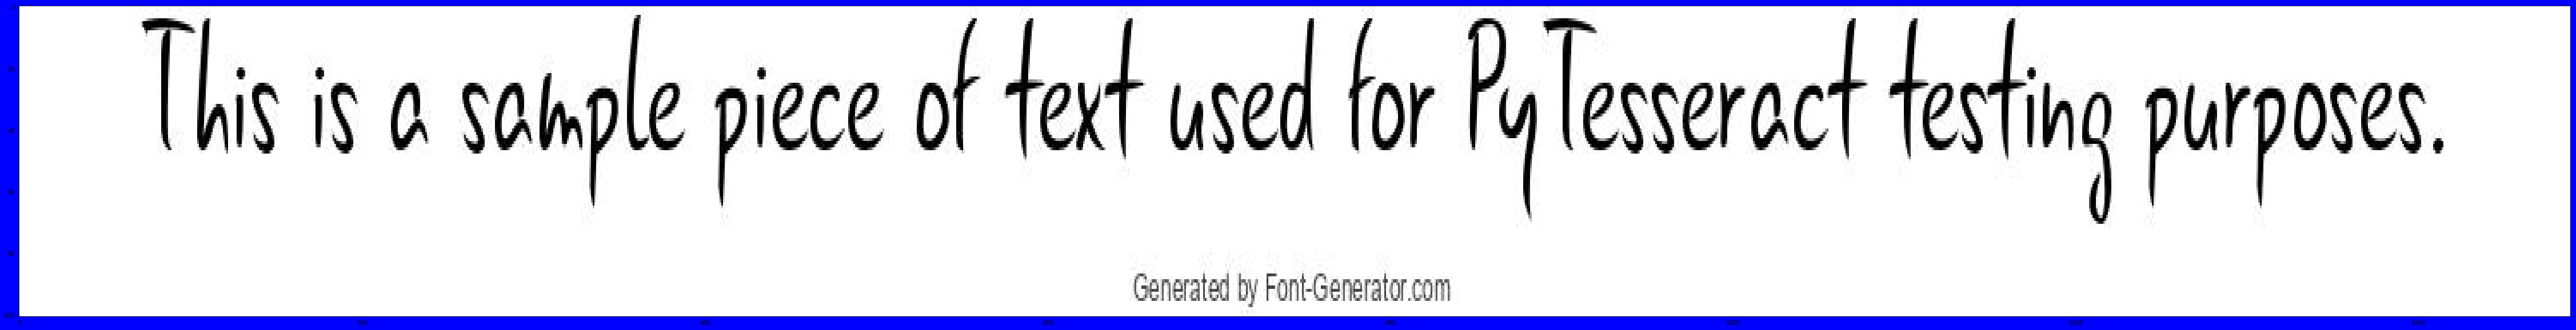

In [7]:


import cv2
import matplotlib.pyplot as plt
import pytesseract
%matplotlib inline

path = './generatedtext.jpg'
img = cv2.imread(filename=path, flags=cv2.IMREAD_COLOR)
img_osd = pytesseract.image_to_osd(image=img)
if __debug__:
    print(img_osd)
    
plt.figure(num=None, figsize=(80, 10), edgecolor='black', facecolor='blue')
plt.imshow(X=img, aspect='auto', origin='upper', cmap='gray')


run_and_get_output<br><br>
Returns the raw output from Tesseract OCR. Gives a bit more control over the parameters that are sent to tesseract.

FileNotFoundError: [Errno 2] No such file or directory: '/var/folders/m0/jb9c2bnn2c51hptzd6s6y_6m0000gn/T/tess_y6m3kpvn.'

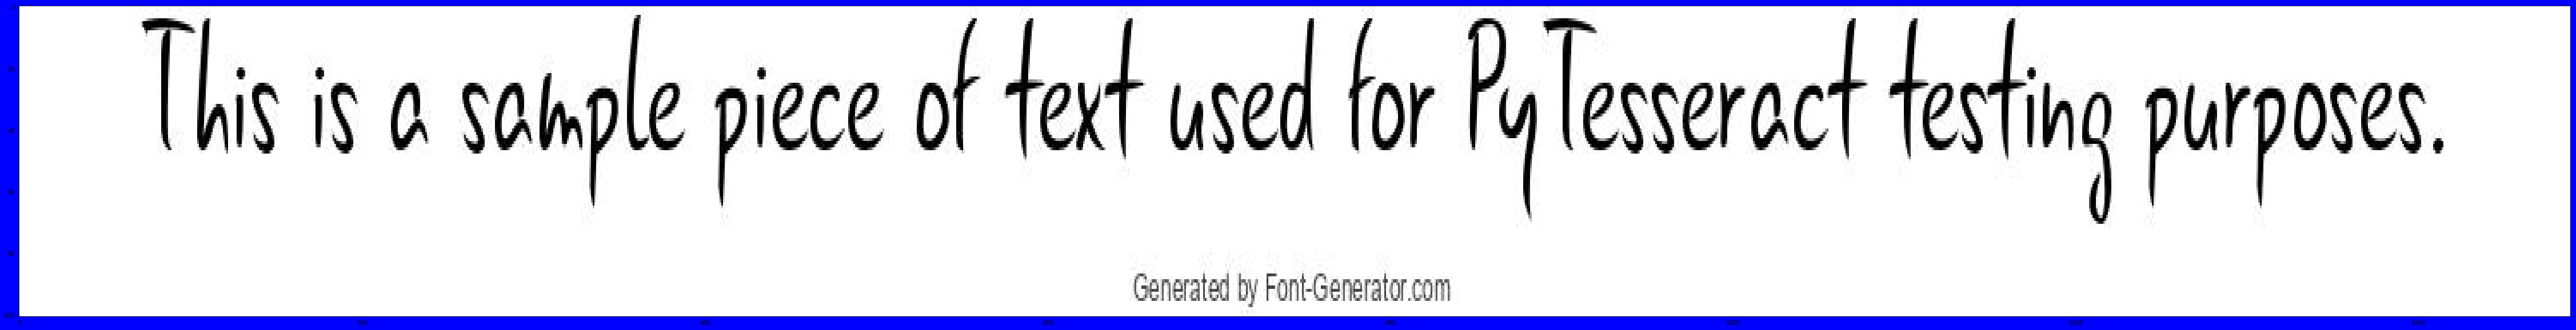

In [8]:

import cv2
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image, ImageDraw
import pytesseract
%matplotlib inline

path = './generatedtext.jpg'
img = cv2.imread(filename=path, flags=cv2.IMREAD_COLOR)
plt.figure(num=None, figsize=(80, 10), edgecolor='black', facecolor='blue')
plt.imshow(X=img, aspect='auto', origin='upper', cmap='gray')

img_run = pytesseract.run_and_get_output(image=img)
if __debug__:
    print(img_run)



## Parameters for Functions

image Object or String - PIL Image/NumPy array or file path of the image to be processed by Tesseract. If you pass object instead of file path, pytesseract will implicitly convert the image to RGB mode.<br><br>
lang String - Tesseract language code string. Defaults to eng if not specified! Example for multiple languages: lang='eng+fra'<br><br>
config String - Any additional custom configuration flags that are not available via the pytesseract function. For example: config='--psm 6'<br><br>
nice Integer - modifies the processor priority for the Tesseract run. Not supported on Windows. Nice adjusts the niceness of unix-like processes.<br><br>
output_type Class attribute - specifies the type of the output, defaults to string. For the full list of all supported types, please check the definition of pytesseract.Output class.<br><br>
timeout Integer or Float - duration in seconds for the OCR processing, after which, pytesseract will terminate and raise RuntimeError.<br><br>
pandas_config Dict - only for the Output.DATAFRAME type. Dictionary with custom arguments for pandas.read_csv. Allows you to customize the output of image_to_data.

## ImagePipeline: an Image Processing Pipeline

ONLY USE NATIVE cv2 OR PIl FUNCTIONS (RETURNS np.ndarray OR PIL.Image.Image) FUNCTION AS STEP

In [173]:

import copy
from collections import OrderedDict
import numpy as np
import PIL
import typing
from typing import Callable, NamedTuple, Union
%matplotlib inline

class StepData(NamedTuple):
    """Necessary parameters for a step in the pipeline"""
    name: str
    new_step: Union[Callable, str]
    img_param_name: str
    outer_function: Callable
    other_params: dict
    capture_index: int
    
class ImagePipeline:
    pass

class ImagePipeline:
    """Pipeline for processing images"""
    def __init__(self):
        """Initializes empty pipeline"""
        self.pipeline = OrderedDict([])

    @property
    def pipeline(self) -> list:
        """Getter for pipeline"""
        return self.__pipeline
    
    @pipeline.setter
    def pipeline(self, new_pipeline: ImagePipeline) -> None:
        """Setter for pipeline"""
        self.__pipeline = copy.deepcopy(x=new_pipeline)
    
    def size(self) -> int:
        """Number of steps in pipeline"""
        return len(self.pipeline)
    
    def empty(self) -> bool:
        """Check if any steps exist in pipeline"""
        return self.size() > 0
    
    def clear(self) -> None:
        """Erase all steps from pipeline"""
        self.pipeline = OrderedDict([])
        
    def copy_steps(self, other_pipeline: ImagePipeline, start:int=0, end:int=None) -> None:
        """
        Copies whole or part of steps from another pipeline
        
        Parameters
        other_pipeline - another CV2Pipeline object to copy from
        start - index of first step to be copied from other_pipeline
        end - index of immediate step after last step to be copied from other_pipeline
        """
        # Error checking
        try:
            if other_pipeline.empty():
                raise AttributeError('other_pipeline cannot be empty')
            if end > other_pipeline.size() or end == None:
                raise RuntimeError('end must be integer no greater than size of other_pipeline')
        except (AttributeError, RuntimeErrorn) as error:
            print(str(error))
            return
            
        self.pipeline = OrderedDict(list(other_pipeline.pipeline.items())[start:end])
        
    def add_step(self, name: str, new_step: Union[Callable, str], img_param_name: str, outer_function=None, other_params: dict=None, capture_index: int=0) -> None:
        """
        Append new function to end of pipeline
        
        Parameters
        name - annotated name of step
        new_step - function to be added
        img_param_name - parameter name designated for image
        outer_function - earlier that new_step function is dependent on; used for PIL functions
        other_params - dictionary of other required parameters and their values besides image
        capture_index - if function returns multiple values, specify index of return tuple (default is 0 for single return)
        """
        try:
            if (outer_function == None and type(new_step) == str) or (outer_function != None and type(new_step) != str):
                raise ValueError('dependent func must be string if module is used')
        except ValueError as error:
            print(str(error))
            return
            
        step_tuple = StepData(name=name, new_step=new_step, img_param_name=img_param_name, outer_function=outer_function,
                              other_params=other_params, capture_index=capture_index)
        self.pipeline.update({name: step_tuple})
        
    def run(self, img: np.ndarray, until: int=None) -> np.ndarray:
        """Run an original image through pipeline"""
        try:
            if until != None and (until < 0 or until > self.size()):
                raise IndexError('until must specify step index within pipeline')
        except IndexError as error:
            print(str(error))
            return
        
        # Running pipeline
        start = 0
        end = until if until != None else self.size()
        img_current = np.asarray(a=img) if type(img) == PIL.Image.Image else img
        for name, step in list(self.pipeline.items())[start:end]:
            """Run each function sequentially in pipeline"""
            print(name)
            outer_function = step.outer_function
            func = step.new_step
            img_param_name = step.img_param_name
            other_params = step.other_params
            
            # index of output image, in case there are multiple returned outputs
            capture_index = step.capture_index
            
            if outer_function == None and type(func) != str:
                """cv2 function"""
                args = {img_param_name: img_current} if other_params == None else {img_param_name: img_current, **other_params}
                retval = func(**args) # return value
                img_current = retval[capture_index] if type(retval) == tuple else retval
            else:
                """PIL function"""
                pil_object = outer_function(**{img_param_name: Image.fromarray(obj=img_current)})
                pil_func = getattr(pil_object, func)
                retval = pil_func() if other_params == None else pil_func(**other_params)
                img_current = retval[capture_index] if type(retval) == tuple else retval
                
            img_current = np.asarray(a=img_current) if type(img_current) == PIL.Image.Image else img_current

        return img_current


Debugging for PIL-compatible step in CV2Pipeline<br>
Not part of final code

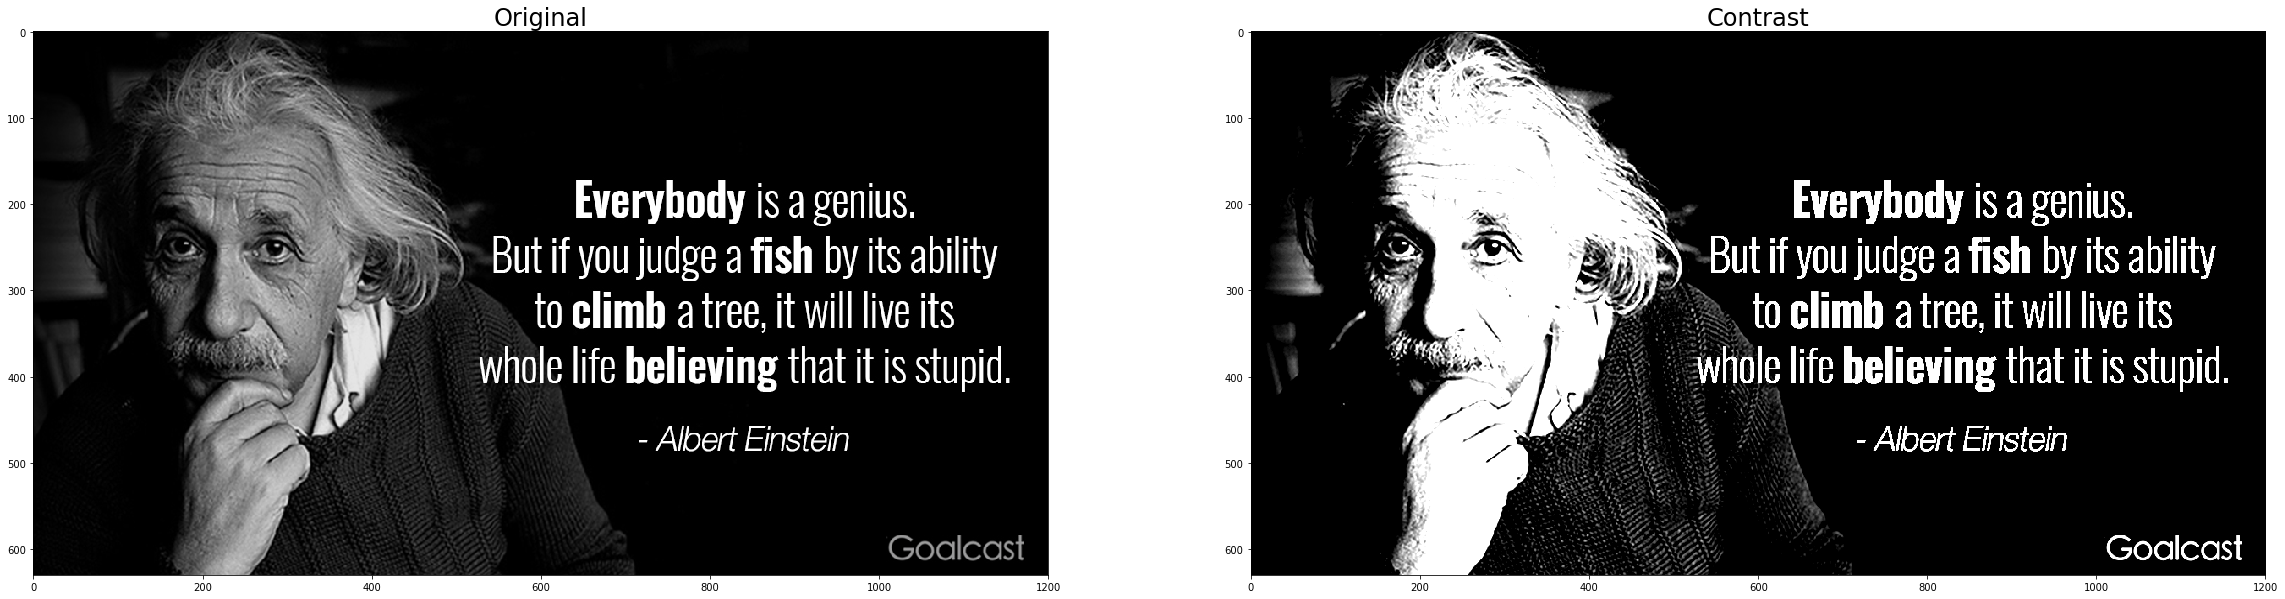

In [166]:

import cv2
import matplotlib.pyplot as plt
import numpy as np
import PIL
%matplotlib inline

path = './einstein_quote.jpg'
img = cv2.imread(filename=path, flags=cv2.IMREAD_COLOR)

def pil_module_step(module, img: np.ndarray, img_param_name: str, other_params: dict=None) -> np.ndarray:
    """Adds PIL function as step"""
    module_object = module(**{img_param_name: PIL.Image.fromarray(obj=img)})
    func = getattr(module_object, 'enhance')
    img_output = np.asarray(a=[func(**other_params)][0])
    return img_output

img_output = pil_module_step(module=PIL.ImageEnhance.Contrast, img=img, img_param_name='image', other_params={'factor': 4})

# Plotting for comparison
fig = plt.figure(num=None, figsize=(40, 10), edgecolor=None, facecolor=None)
plt.subplot(121)
plt.title(label='Original', size=24)
plt.imshow(X=img, aspect='auto', origin='upper')

plt.subplot(122)
plt.title(label='Contrast', size=24)
plt.imshow(X=img_output, aspect='auto', origin='upper')


## Cropping out Detected Boxes

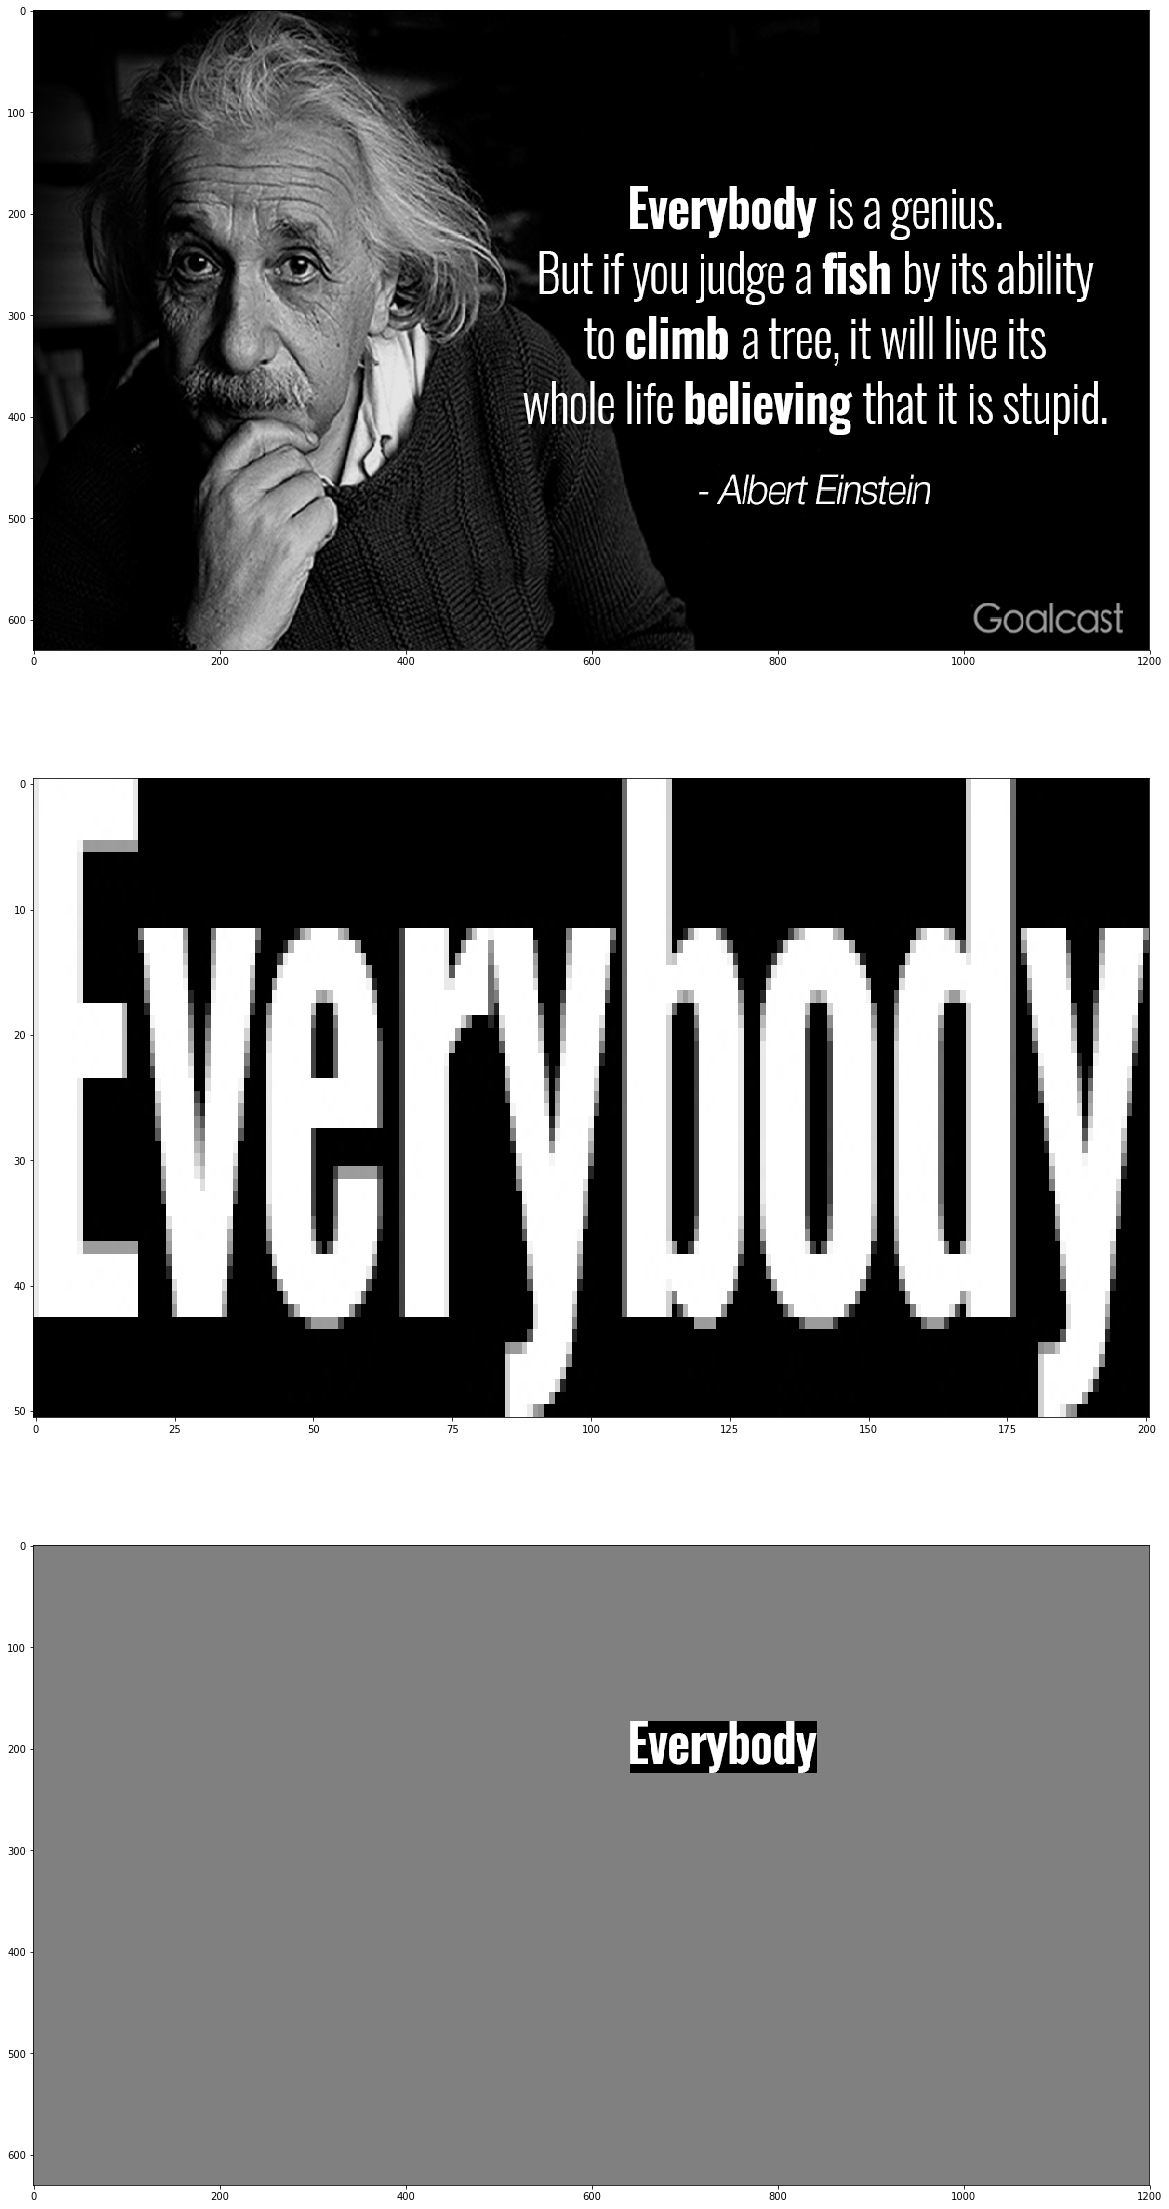

In [167]:

import matplotlib.pyplot as plt
import numpy as np
import PIL
from PIL import Image, ImageDraw, ImageOps
import pytesseract
from pytesseract import Output
%matplotlib inline

path = './einstein_quote.jpg'
img = Image.open(fp=path, mode='r')
img_cropped = Image.new(mode='RGB', size=np.asarray(a=img).shape[:2][::-1], color='gray')

# pts of box vertices are clocwise: top left, top right, bottom right, bottom left
xy = [642, 173, 642 + 201, 173 + 51]
crop = img.crop(box=tuple(xy))
img_cropped.paste(im=crop, box=xy)

fig = plt.figure(num=None, figsize=(20, 40), edgecolor=None, facecolor=None)
plt.subplot(311)
plt.imshow(X=img, aspect='auto', origin='upper')

plt.subplot(312)
plt.imshow(X=crop, aspect='auto', origin='upper')

plt.subplot(313)
plt.imshow(X=img_cropped, aspect='auto', origin='upper')


Function to crop out bounding boxes of all detected text

In [169]:

import PIL
from PIL import Image
import numpy as np

def crop_text(img: np.ndarray) -> np.ndarray:
    """Crops out everything except for detected words"""
    # Error checking for input shape
    try:
        if type(img) != np.ndarray:
            raise TypeError('type must be np.ndarray')
        if len(img.shape) not in range(2, 4):
            raise ValueError('shape of image must be 2 or 3 in dimension')
        if len(img.shape) == 3 and len(img.shape[2]) != 3:
            raise ValueError('RGB image must have 3 values for RGB')
    except (TypeError, ValueError, RuntimeError) as error:
        print(str(error))
        return

    # Convert cv2-compatible image to PIL Image object first
    img_pil = Image.fromarray(obj=img)
    img_cropped = Image.new(mode='RGB', size=img.shape[:2][::-1], color='gray')
    
    # Detecting words / numerals and retrieving bounding boxes
    data = pytesseract.image_to_data(image=img, lang=None, config='', nice=0, output_type=Output.DICT)
#     print(data)
    text_index = np.array([], dtype=np.int32)
    for index, text in enumerate(np.asarray(a=data.get('text')), start=0):
        if text.isalnum():
            text_index = np.append(arr=text_index, values=index)

    # Bounding box information
    left = np.asarray(a=data['left'])[text_index]
    top = np.asarray(a=data['top'])[text_index]
    width = np.asarray(a=data['width'])[text_index]
    height = np.asarray(a=data['height'])[text_index]
    
    for index, item in enumerate(text_index, start=0):
        """Crops and pastes each detected text to a gray blank background image"""
        box = (left[index], top[index], left[index] + width[index], top[index] + height[index])
        crop = img_pil.crop(box=box)
        img_cropped.paste(im=crop, box=box)

    return np.asarray(a=img_cropped)
        

## CV2 Pipeline Example

Grayscale
Crop Text
Contrast
Simple Threshold
['', '', '', '', 'SENLIL', 'Be', '', 'BOVE', 'Gi', 'oe', 'TIRE', '=', 'TST', 'OY', '1S', 'ALi', '', 'AMF', 'iM', 'mis', '', 'Mine', 'TTT', '|', 'STON', '', '', '', 'A', 'periiE', 'instein}', '', '', '', '"', '1"', '', 'Slelelietek']


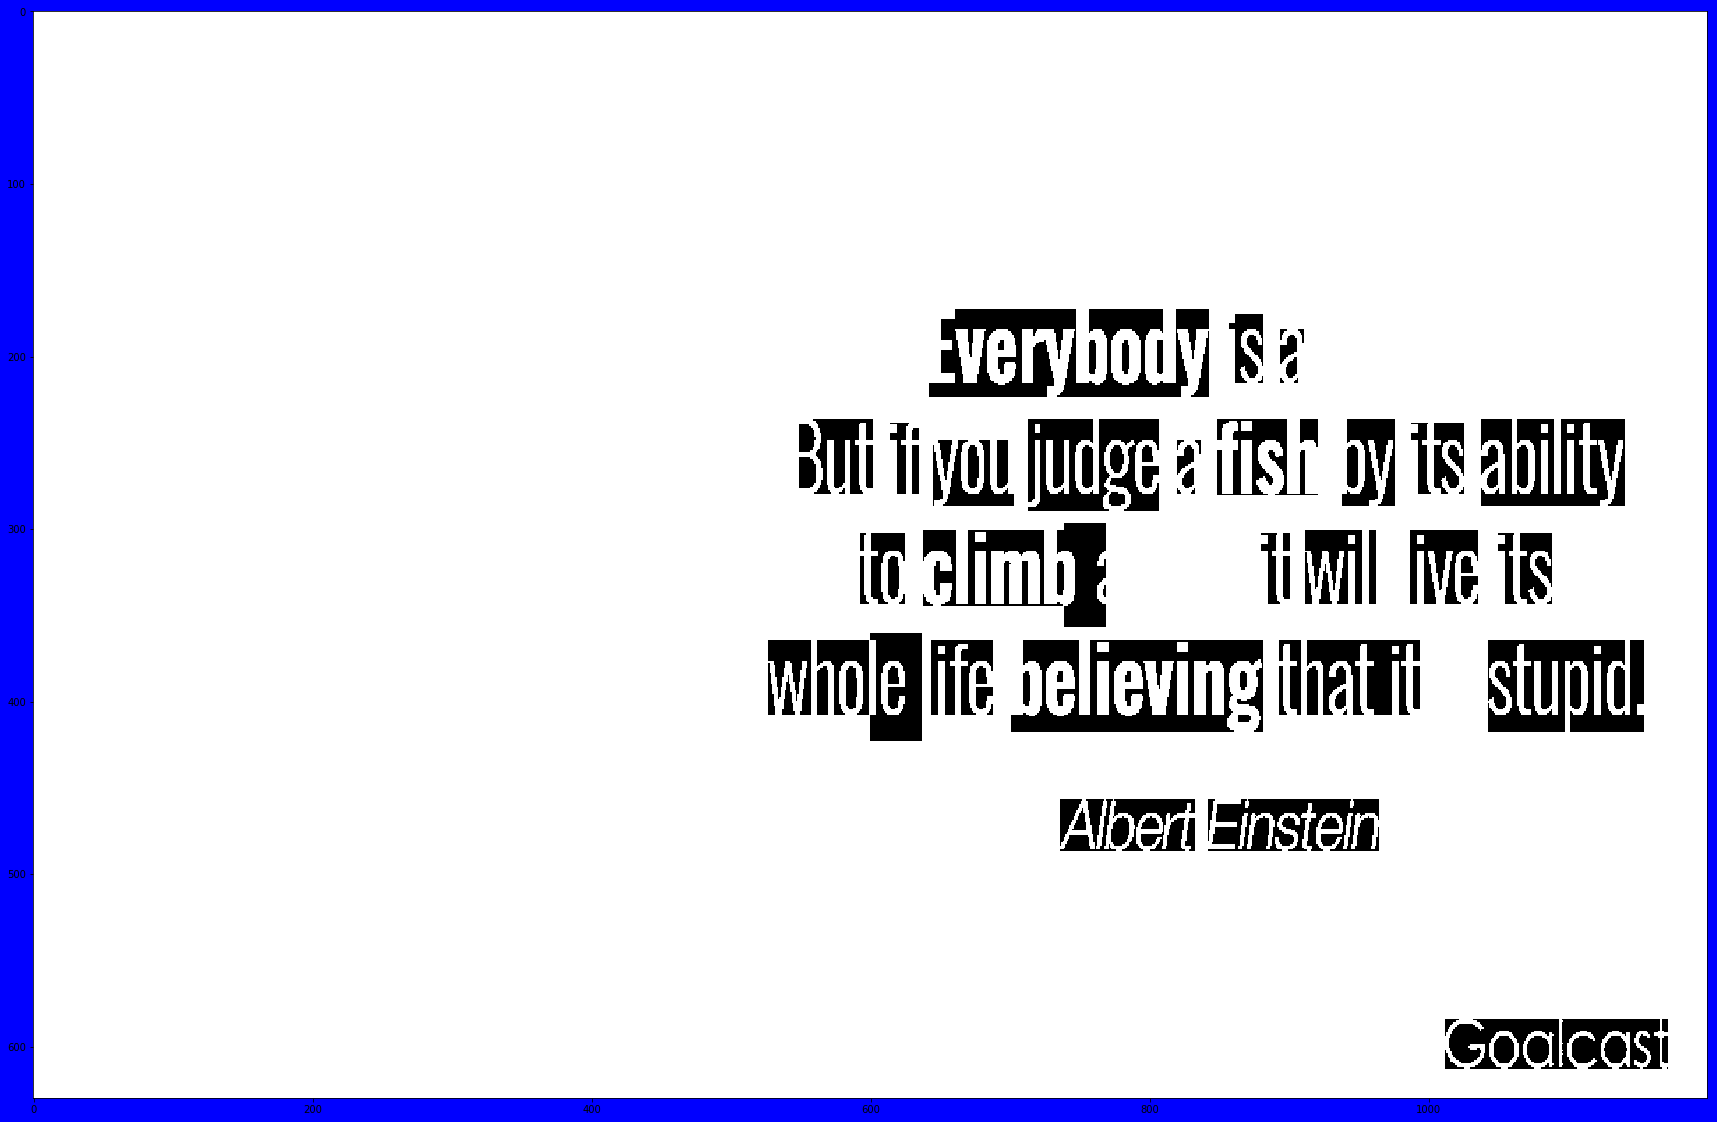

In [174]:

import cv2
import matplotlib.pyplot as plt
from PIL import Image, ImageEnhance
import pytesseract
from pytesseract import Output
from typing import Union
%matplotlib inline

# Setting up image
path = './einstein_quote.jpg'
img = cv2.imread(filename=path, flags=cv2.IMREAD_UNCHANGED)

pipeline = ImagePipeline()
pipeline.add_step(name='Grayscale', new_step=cv2.cvtColor, img_param_name='src', other_params={'code': cv2.COLOR_RGB2GRAY})
pipeline.add_step(name='Crop Text', new_step=crop_text, img_param_name='img', other_params=None)
pipeline.add_step(name='Contrast', outer_function=PIL.ImageEnhance.Contrast, new_step='enhance', img_param_name='image', other_params={'factor': 4})
pipeline.add_step(name='Simple Threshold', new_step=cv2.threshold, img_param_name='src', other_params={'thresh': 20, 'maxval': 255, 'type': cv2.THRESH_BINARY}, capture_index=1)

img_piped = pipeline.run(img=img)
plt.figure(num=None, figsize=(30, 20), edgecolor='black', facecolor='blue')
plt.imshow(X=img_piped, aspect='auto', origin='upper', cmap='gray')

# words spotted
result_text = pytesseract.image_to_data(image=img_piped, output_type=Output.DICT)['text']
print(result_text)


## OCRPageData Class

Custom class that holds organized collections of data for each OCRPage and the image

In [142]:

import cv2
import copy
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import pytesseract
from pytesseract import Output
from typing import Union
%matplotlib inline

class OCRPageData:
    """Container for raw image data and detected words"""
    def __init__(self, img: Union[np.ndarray, Image.Image]):
        """Initializes container with image"""
        self.image = img

    @property
    def image(self):
        """Gets raw image"""
        return self.__image
    
    @image.setter
    def image(self, new_img: Union[np.ndarray, Image.Image]) -> None:
        """
        Sets new image, which is same as initialization
        
        Parameters
        new_img - new image
        """
        # Retrieving text and character data
        self.__image = new_img if type(new_img) == Image.Image else Image.fromarray(obj=new_img, mode=None)
        result_data = pytesseract.image_to_data(image=np.asarray(a=new_img), output_type=Output.DICT)
        text_index = np.array([], dtype=int) # index of text in original image_to_data['text'] array
        for index, text in enumerate(np.asarray(a=result_data['text']), start=0):
            if text.isalnum():
                text_index = np.append(arr=text_index, values=index)

        print(text_index)
        raw_texts = result_data['text']
        texts = np.asarray(a=raw_texts)[text_index]
        self.__text_counter = Counter(texts) # Counts number of occurrences of each text piece
        self.__texts = list(self.text_counter.keys()) # Unique detected texts
        chars = list(''.join(result_data['text']))
        self.__char_counter = Counter(chars) # Counts number of occurences of each character
        self.__chars = list(self.char_counter.keys()) # Unique number of occurrences of each character
        
        # Retrieving bounding box information
        self.__left = np.asarray(a=result_data['left'])[text_index]
        self.__top = np.asarray(a=result_data['top'])[text_index]
        self.__width = np.asarray(a=result_data['width'])[text_index]
        self.__height = np.asarray(a=result_data['height'])[text_index]

    @property
    def text_counter(self) -> Counter:
        """Get Counter object for detected words"""
        return self.__text_counter
    
    @property
    def char_counter(self) -> Counter:
        """Get Counter object for detected characters"""
        return self.__char_counter
    
    def char_histogram(self) -> np.ndarray:
        """Histogram of frequencies for each ASCII character"""
        frequency = OrderedDict([(ascii_value, 0) for ascii_value in np.arange(32, 127)])
        for character in list(self.char_counter.keys()):
            frequency[ord(character)] = self.char_counter[character]
        
        print(frequency)
        return np.asarray(a=list(frequency.values())), np.asarray(a=list(frequency.keys()))
    
    @property
    def texts(self) -> np.ndarray:
        """Gets list of unique text (both alpha and numerical) detected from image"""
        return self.__texts
    
    @property
    def chars(self) -> np.ndarray:
        """Gets list of unique characters detected from image"""
        return self.__chars
    
    @property
    def left(self) -> np.ndarray:
        """Gets left x-value of bounding box for each detected text"""
        return self.__left
    
    @property
    def top(self) -> np.ndarray:
        """Gets top y-value of bounding box for each detected text"""
        return self.__top
    
    @property
    def width(self) -> np.ndarray:
        """Gets width of bounding box for each detected text"""
        return self.__width
    
    @property
    def height(self) -> np.ndarray:
        """Gets height of each bounding box for each detected text"""
        return self.__height
        

## OCRPageData Example

[ 4  5  7  8  9 10 11 12 13 14 15]
<class '__main__.OCRPageData'>
<class 'PIL.Image.Image'>
-----------------------------------------------------------------------------------------------------------------------------
<class 'PIL.Image.Image'>
<PIL.Image.Image image mode=RGB size=1489x101 at 0x7F9E03EE8990>
-----------------------------------------------------------------------------------------------------------------------------
Counter({'This': 1, 'iS': 1, 'sample': 1, 'piece': 1, 'of': 1, 'text': 1, 'used': 1, 'for': 1, 'Fy': 1, 'Tesseract': 1, 'testing': 1})
Counter({'e': 9, 's': 8, 't': 5, 'i': 4, 'p': 4, 'o': 3, 'r': 3, 'T': 2, 'a': 2, 'c': 2, 'f': 2, 'u': 2, 'h': 1, 'S': 1, '@': 1, 'm': 1, 'l': 1, 'x': 1, 'd': 1, 'F': 1, 'y': 1, 'n': 1, 'g': 1, '.': 1})
-----------------------------------------------------------------------------------------------------------------------------
OrderedDict([(32, 0), (33, 0), (34, 0), (35, 0), (36, 0), (37, 0), (38, 0), (39, 0), (40, 0), (41, 0),

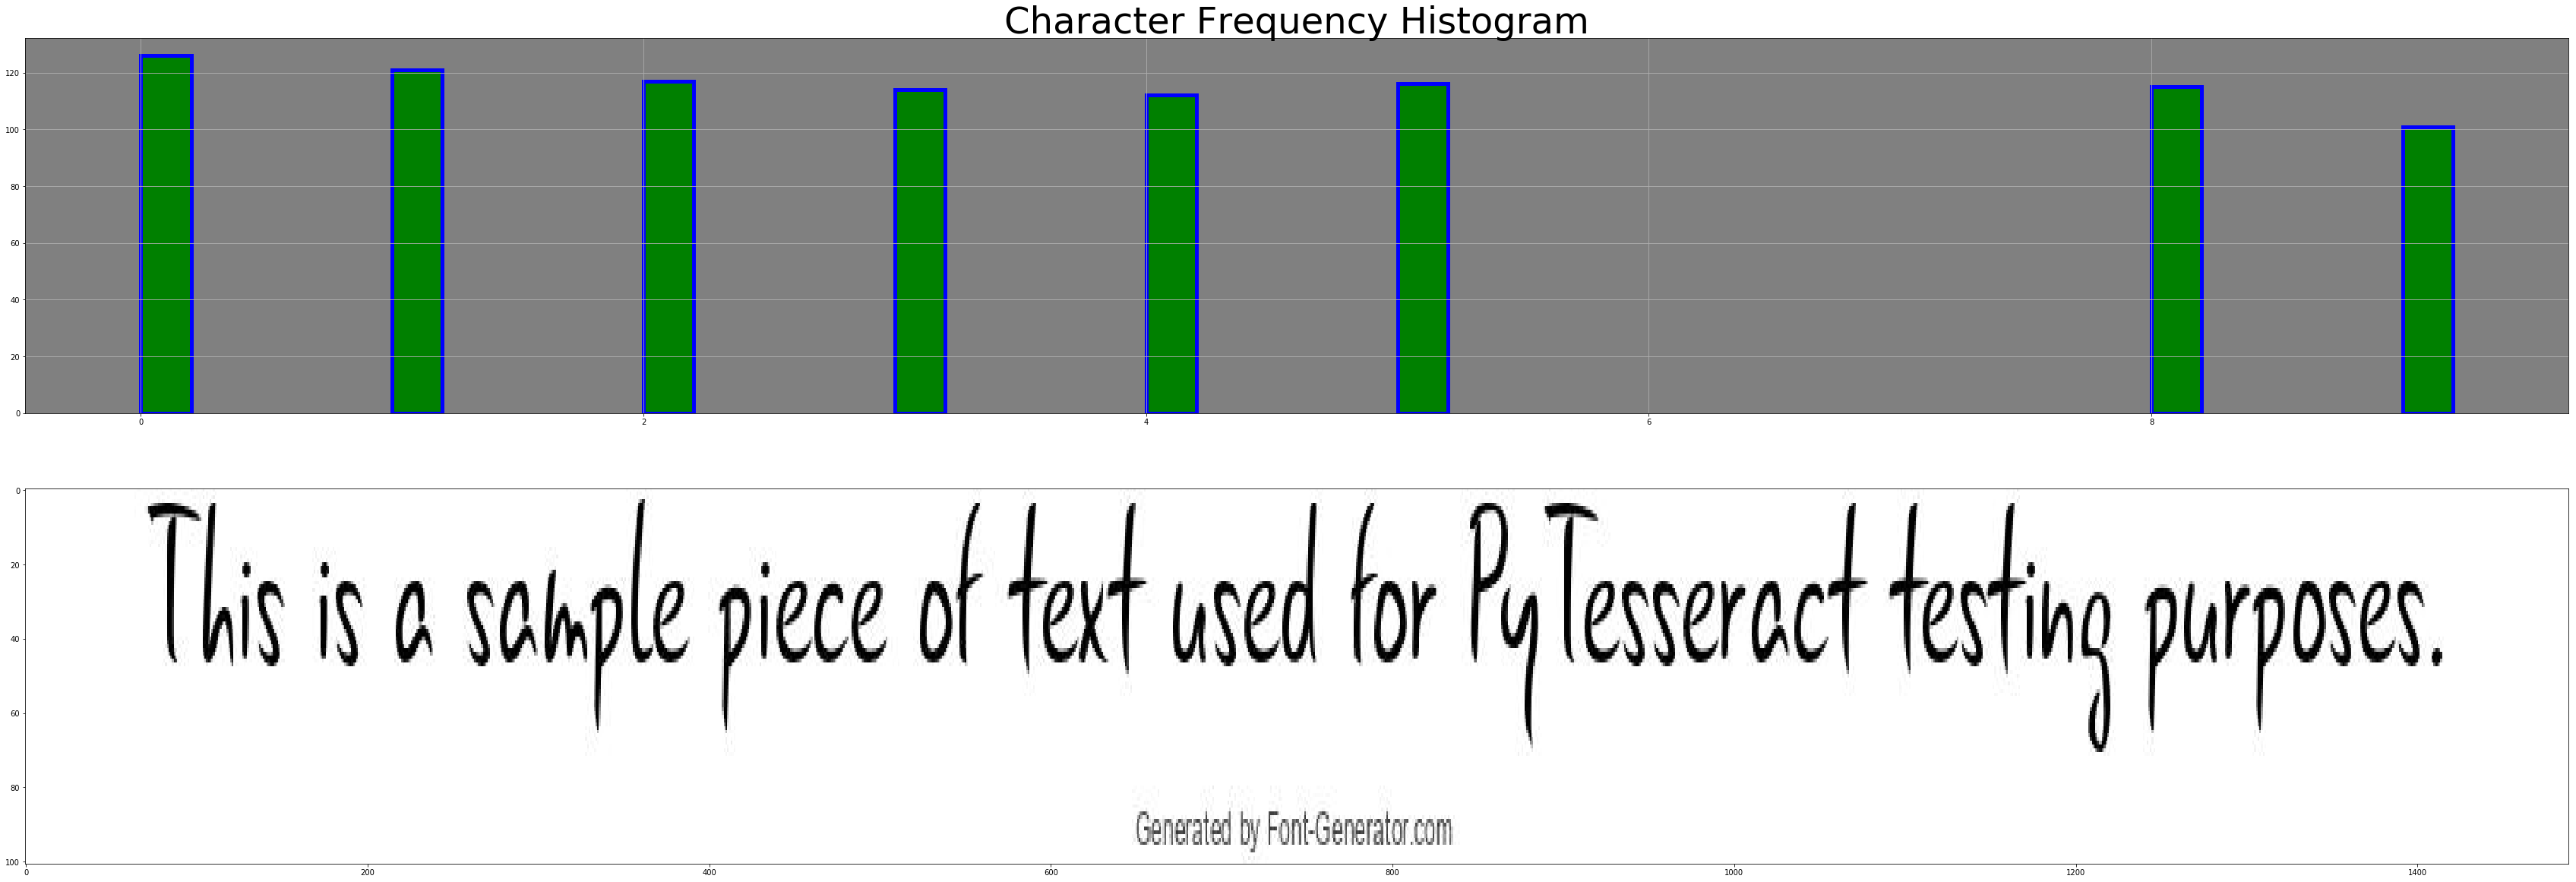

In [144]:

import cv2
import matplotlib.pyplot as plt
%matplotlib inline

img = cv2.imread(filename='./generatedtext.jpg', flags=cv2.IMREAD_UNCHANGED)
ocrb = OCRPageData(img=img)
img_ocrb = ocrb.image
print(type(ocrb))
print(type(img_ocrb))

print('-' * 125)
print(type(img_ocrb))
print(img_ocrb)
print('-' * 125)
print(ocrb.text_counter)
print(ocrb.char_counter)
print('-' * 125)

plt.figure(num=None, figsize=(60, 20), edgecolor=None, facecolor=None)
plt.subplot(211)
x, height = ocrb.char_histogram()
print(x)
print(height)
print('-' * 125)

plt.title(label='Character Frequency Histogram', size=48)
plt.grid(b=None, which='major', axis='both')
g = plt.gca()
g.set_facecolor('gray')
plt.bar(x=x, height=height, align='edge', color='green', edgecolor='blue', linewidth=5, width=0.2)

plt.subplot(212)
plt.imshow(X=img_ocrb, aspect='auto', origin='upper')


## Serializing OCRPageData Using Pickle

[ 4  5  7  8  9 10 11 12 13 14 15]
<class '__main__.OCRPageData'>
-----------------------------------------------------------------------------------------------------------------------------
Image:
 <PIL.Image.Image image mode=RGB size=1489x101 at 0x7F9E01B169D0>
-----------------------------------------------------------------------------------------------------------------------------
Counters:
 Counter({'This': 1, 'iS': 1, 'sample': 1, 'piece': 1, 'of': 1, 'text': 1, 'used': 1, 'for': 1, 'Fy': 1, 'Tesseract': 1, 'testing': 1})
Counter({'e': 9, 's': 8, 't': 5, 'i': 4, 'p': 4, 'o': 3, 'r': 3, 'T': 2, 'a': 2, 'c': 2, 'f': 2, 'u': 2, 'h': 1, 'S': 1, '@': 1, 'm': 1, 'l': 1, 'x': 1, 'd': 1, 'F': 1, 'y': 1, 'n': 1, 'g': 1, '.': 1})
-----------------------------------------------------------------------------------------------------------------------------
Unique texts and characters:
 ['This', 'iS', 'sample', 'piece', 'of', 'text', 'used', 'for', 'Fy', 'Tesseract', 'testing']
['T', 'h', '

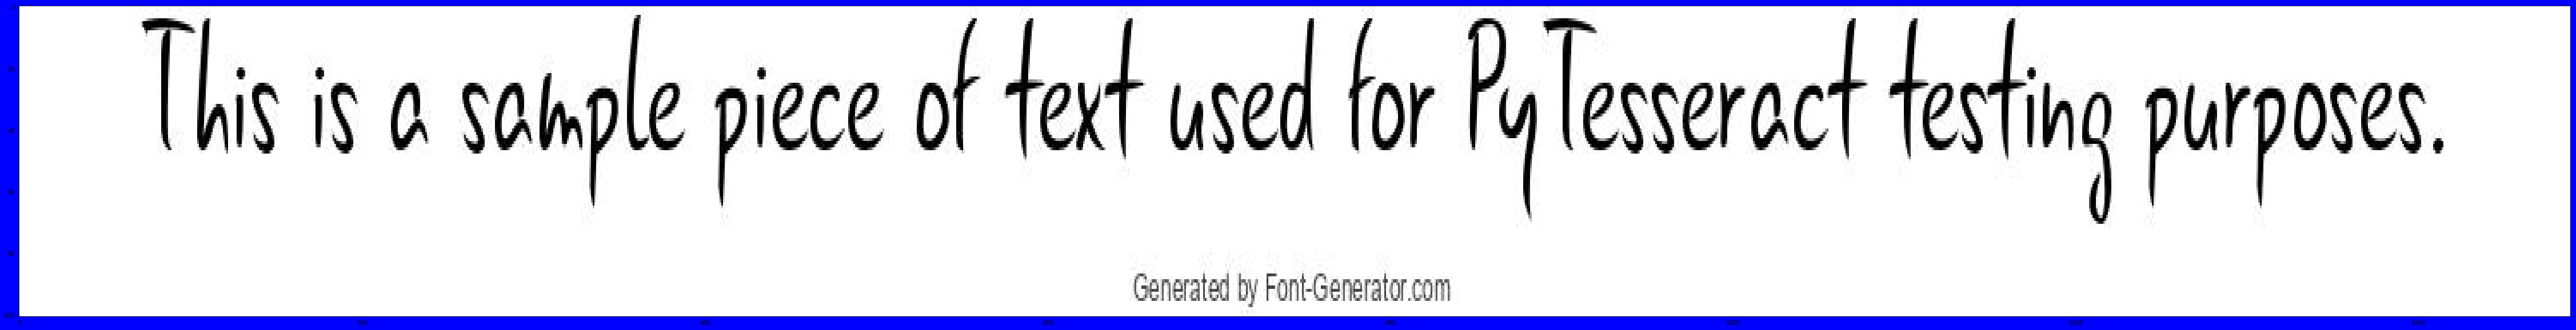

In [146]:

import cv2
import matplotlib.pyplot as plt
import numpy as np
import pickle
%matplotlib inline

img = cv2.imread(filename='./generatedtext.jpg', flags=cv2.IMREAD_UNCHANGED)
ocrb = OCRPageData(img=img)

with open(file='./dump.txt', mode='wb') as dump:
    pickle.dump(obj=ocrb, file=dump)

with open(file='./dump.txt', mode='rb') as load:
    orcb_load = pickle.load(file=load, fix_imports=True, encoding='UTF-8', errors='strict')
    print(type(orcb_load))
    print(ocrb)
    print('-' * 125)
    print('Image:\n', ocrb.image)
    print('-' * 125)
    print('Counters:\n', ocrb.text_counter)
    print(ocrb.char_counter)
    print('-' * 125)
    print('Unique texts and characters:\n', ocrb.texts)
    print(ocrb.chars)
    print('-' * 125)
    print('Bounding Box Info:')
    print('left:\n', ocrb.left, end='\n\n')
    print('top:\n', ocrb.top, end='\n\n')
    print('width:\n', ocrb.width, end='\n\n')
    print('height:\n', ocrb.height, end='\n\n')
    print('-' * 125)
    fig = plt.figure(num=None, figsize=(80, 10), edgecolor='black', facecolor='blue')
    plt.imshow(X=np.asarray(a=ocrb.image), aspect='auto', origin='upper')
    

## Streamlining OCR into Sqlite Database

In [150]:
from peewee import Model, fn
from peewee import BlobField, CharField, ForeignKeyField, IntegerField, PrimaryKeyField, TextField
from playhouse.sqlite_ext import SqliteExtDatabase

# Should likely change where the database files are stored
DATABASE = 'ocr_files.db'

db = SqliteExtDatabase(DATABASE, c_extensions=True, pragmas=(
    ('journal_mode', 'wal'),  # Use WAL-mode
    ('foreign_keys', 1)))  # Enforce foreign-key constraints


class BaseModel(Model):
    """Root of database storage hierarchy"""
    class Meta:
        database = db


# Table entry for an OCR'ed document
class OcrDocument(BaseModel):
    id = PrimaryKeyField(null=False)
    name = CharField(unique=True)


# Stores an individual page of OCR'ed document
# Also stores the original image file of the page
class OcrPage(BaseModel):
    id = PrimaryKeyField(null=False)
    number = IntegerField(null=False) # Page number of doc
    ocr_page_data = BlobField(null=False)
    document = ForeignKeyField(OcrDocument, backref='pages')

# Stores an individual text block with coordinates
# class OcrBlock(BaseModel):
#     id = PrimaryKeyField(null=False)
#     page = ForeignKeyField(OcrPage, backref='blocks')
#     left = IntegerField()
#     top = IntegerField()
#     width = IntegerField()
#     height = IntegerField()
#     # Should we store confidence values?
#     conf = IntegerField()
#     text = TextField()


# Helper function to intially create the tables in the database
def create_tables():
    with db:
        db.create_tables(models=[OcrDocument, OcrPage])
